<a href="https://colab.research.google.com/github/Alissssssa2003/Alissssssa2003/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd

df = pd.read_csv('/content/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
import pandas as pd
import numpy as np
def create_holes(dataframe, column_name, hole_percentage = 10):

    if hole_percentage < 0 or hole_percentage > 100:
        raise ValueError("Процент дырявости должен быть в диапазоне от 0 до 100.")

    dataframe_with_holes = dataframe.copy()
    num_holes = int(len(dataframe) * (hole_percentage / 100))
    hole_indices = np.random.choice(len(dataframe), num_holes, replace=False)
    dataframe_with_holes.loc[hole_indices, column_name] = np.nan

    return dataframe_with_holes


df = create_holes(df, 'loan_id')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,NaN,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_cleaned = df.dropna()
df_cleaned

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6.0,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_filled_median = df.fillna(df.median())

df_filled_median

<ipython-input-155-d58a90771547>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled_median = df.fillna(df.median())


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,2132.0,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_filled_mean = df.copy()
df_filled_mean["loan_id"] = df["loan_id"].fillna(df.loan_id.mean())
df_filled_mean

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.000000,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.000000,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,2135.282071,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.000000,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.000000,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.000000,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.000000,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.000000,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.000000,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_filled_mode = df.fillna(df["loan_id"].mode()[0])

df_filled_mode

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,1.0,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_interpolated = df.copy()
df_interpolated["loan_id"] = df["loan_id"].fillna(df.interpolate().loan_id)
df_interpolated

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3.0,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


Для начала мне нужно было найти пропущенные значения (или NaN - Not a Number) - это отсутствующие данные в датасете, НО у меня их не оказалось, поэтому первым делом я их сделала, причем использовать нужно именно числовые значения как я поняла, потому что с education у меня ничего не вышло. Затем я удалила все эти пропущенные значения с помощью cleaned. Потом мне нужно было заполнить эти пропущенные значения и я сделала это с помощью интерполяции, все прошло успешно. После еще раз вывела данные, чтобы посмотреть как все получилось.

**Объясните**

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [ ]:
import matplotlib.pylab as plt

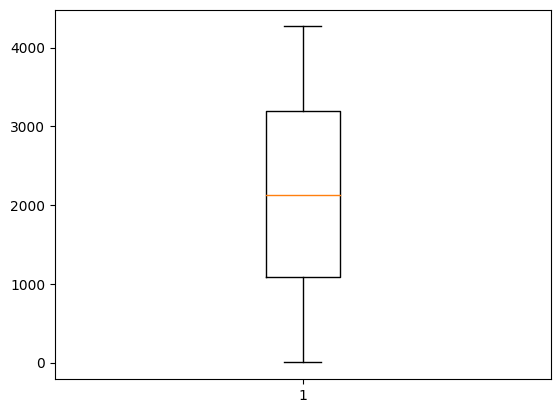

In [ ]:
df = df.dropna()
plt.boxplot(df["loan_id"])
plt.show()

In [ ]:

df["loan_id"].describe()

count    3843.000000
mean     2135.282071
std      1229.751030
min         1.000000
25%      1083.500000
50%      2132.000000
75%      3194.500000
max      4269.000000
Name: loan_id, dtype: float64

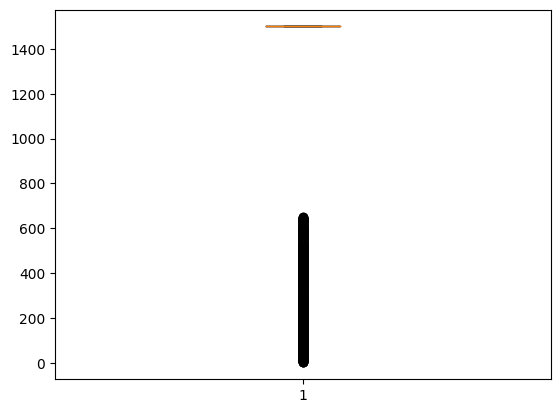

In [ ]:
#Добавим выбросов
df.loc[649:4500, "loan_id"] =1500
plt.boxplot(df["loan_id"])
#Выброс есть
plt.show()

In [ ]:
df["loan_id"].describe()

count    3843.000000
mean     1321.720531
std       428.261413
min         1.000000
25%      1500.000000
50%      1500.000000
75%      1500.000000
max      1500.000000
Name: loan_id, dtype: float64

In [ ]:
mean = df["loan_id"].mean()
std_deviation = df["loan_id"].std()
threshold = 3 * std_deviation

# Идентифицируем выбросы
outliers = [x for x in df["loan_id"] if abs(x - mean) > threshold]

# Выводим результаты
print("Среднее значение данных:", mean)
print("Стандартное отклонение данных:", std_deviation)
print("Потенциальные выбросы:", outliers)

Среднее значение данных: 1321.720530835285
Стандартное отклонение данных: 428.2614126273574
Потенциальные выбросы: [1.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0]


**Объяснения**

Я решила пойти по простому пути, поэтому решила рассмотреть id кредиторов. На графиках представлены выбрасы и общее распределение переменных.  Среденее значение данных получилось 1321, а вот стандартное отклонение 428. Так же я вывела потенциальные выбросы.

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [ ]:

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3843.000000,3843.000000,3.843000e+03,3.843000e+03,3843.000000,3843.000000,3.843000e+03,3.843000e+03,3.843000e+03,3.843000e+03
mean,2135.282071,2.483997,5.073979e+06,1.516531e+07,10.912308,599.532136,7.476945e+06,4.990424e+06,1.515665e+07,4.991283e+06
std,1229.751030,1.691896,2.798853e+06,9.029675e+06,5.708096,172.376130,6.511062e+06,4.396115e+06,9.083124e+06,3.242281e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1083.500000,1.000000,2.700000e+06,7.750000e+06,6.000000,453.000000,2.200000e+06,1.400000e+06,7.600000e+06,2.400000e+06
50%,2132.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3194.500000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.870000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:

df = pd.concat((df, df.iloc[0:100]))
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3943.000000,3943.000000,3.943000e+03,3.943000e+03,3943.000000,3943.000000,3.943000e+03,3.943000e+03,3.943000e+03,3.943000e+03
mean,2082.643165,2.488968,5.079254e+06,1.517773e+07,10.936850,598.827035,7.488689e+06,5.000330e+06,1.517416e+07,4.993330e+06
std,1257.165018,1.690940,2.801620e+06,9.039212e+06,5.704887,172.530979,6.532815e+06,4.403006e+06,9.100065e+06,3.239232e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,994.500000,1.000000,2.700000e+06,7.800000e+06,6.000000,452.000000,2.200000e+06,1.400000e+06,7.600000e+06,2.400000e+06
50%,2079.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,599.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3169.500000,4.000000,7.500000e+06,2.160000e+07,16.000000,747.000000,1.140000e+07,7.700000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.870000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:

df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1.0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2.0,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,4.0,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5.0,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6.0,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265.0,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266.0,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267.0,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268.0,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
df_no_duplicates.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3843.000000,3843.000000,3.843000e+03,3.843000e+03,3843.000000,3843.000000,3.843000e+03,3.843000e+03,3.843000e+03,3.843000e+03
mean,2135.282071,2.483997,5.073979e+06,1.516531e+07,10.912308,599.532136,7.476945e+06,4.990424e+06,1.515665e+07,4.991283e+06
std,1229.751030,1.691896,2.798853e+06,9.029675e+06,5.708096,172.376130,6.511062e+06,4.396115e+06,9.083124e+06,3.242281e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1083.500000,1.000000,2.700000e+06,7.750000e+06,6.000000,453.000000,2.200000e+06,1.400000e+06,7.600000e+06,2.400000e+06
50%,2132.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3194.500000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.870000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_features = df.select_dtypes(include=['float64']).columns

num_features

Index(['loan_id'], dtype='object')

In [ ]:
df.loan_id.unique()

array([1.000e+00, 2.000e+00, 4.000e+00, ..., 4.267e+03, 4.268e+03,
       4.269e+03])

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# MinMax масштабирование
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[num_features] = scaler_minmax.fit_transform(df[num_features])
df_minmax_scaled.loan_id.unique()

array([0.00000000e+00, 2.34301781e-04, 7.02905342e-04, ...,
       9.99531396e-01, 9.99765698e-01, 1.00000000e+00])

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standard масштабирование
scaler_std = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_features] = scaler_std.fit_transform(df[num_features])
df_std_scaled.loan_id.unique()

array([-1.65603334, -1.6552378 , -1.65364671, ...,  1.73774632,
        1.73854186,  1.7393374 ])

In [ ]:
df_scaled = df.copy() # копируем df, чтобы по ссылке не изменять оригинальный
df_scaled[num_features] = df_std_scaled[num_features]

In [ ]:

df_scaled

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.656033,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,-1.655238,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,-1.653647,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,-1.652851,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,-1.652056,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-1.567728,3,Graduate,Yes,7400000,18200000,14,302,5600000,3100000,17900000,5000000,Rejected
112,-1.566933,5,Not Graduate,No,7100000,19700000,8,502,7300000,5600000,25300000,9800000,Rejected
113,-1.566137,5,Not Graduate,Yes,7300000,22100000,18,879,19500000,10600000,19300000,9800000,Approved
114,-1.565342,1,Not Graduate,No,8400000,23400000,14,437,15400000,5800000,33400000,8100000,Rejected


##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])